In [56]:
import numpy as np
import math

from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# criteria for splits
SPL_CRITERIA = ['gini', 'entropy']
# data paths
CLEAN_REAL_PATH = "data/clean_real.txt"
CLEAN_FAKE_PATH = "data/clean_fake.txt"
# class labels
REAL_LABEL = '1'
FAKE_LABEL = '0'

In [3]:
'''
this is question 3a.
''' 

def load_data():
    f = open(CLEAN_REAL_PATH, "r")
    real_headlines = f.read().splitlines() # ?
    f.close()

    f = open(CLEAN_FAKE_PATH, "r")
    fake_headlines = f.read().splitlines()
    f.close()

    count_real = len(real_headlines)
    count_fake = len(fake_headlines)
    count_total = count_real + count_fake
    all_headlines = np.asarray(real_headlines + fake_headlines) # ?
    print(all_headlines)

    vectorizer = CountVectorizer() 
    X = vectorizer.fit_transform(all_headlines)

    # Adding labels after vectorizer
    real_labels = np.full((count_real, 1), REAL_LABEL) # ?
    fake_labels = np.full((count_fake, 1), FAKE_LABEL)
    all_labels = np.append(real_labels, fake_labels)

    
    b = all_labels.reshape(1, count_total) # ? 
    y = b.T

    # 70 / 30 split into train + (test+val)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
        test_size=0.3, random_state=1)

    # then split 30 into 15 validation, 15 test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
        test_size=0.5, random_state=1)

    return X_train, X_val, X_test, y_train, y_val, y_test, count_total, vectorizer

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, count_total, vectorizer = load_data()

['donald trump do you remember the year since he was elected'
 'trump defends son over emails as moscow hits back'
 'donald trump strategist says media wont easily give back america' ...
 'breaking donald trump makes major clinton indictment announcement details'
 'no hate crimes have not intensified since trump election'
 'who to blame for president trump']


In [5]:
X_train.shape, X_test.shape

((2286, 5799), (490, 5799))

In [6]:
y_train.shape, y_test.shape

((2286, 1), (490, 1))

In [7]:
y_train[:10]

array([['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1']], dtype='<U1')

In [8]:
'''
this is question 3 b
'''

def fit_tree(params, X_train, y_train, X_val, y_val):
    """to fit the decision tree with a specific criteria and depth"""
    
    clf = DecisionTreeClassifier(
            max_depth=params["max_depth"], 
            criterion=params["criteria"],
            splitter="random", # ?
    )
    # train 
    clf.fit(X=X_train, y=y_train) 

    # validate 
    y_pred = clf.predict(X=X_val)
    correct = sum(i == j for i, j in zip(y_pred, y_val)) # ?
    score = correct / y_val.shape[0]
    print(f"max_depth: {params['max_depth']} | criteria: {params['criteria']} | score: {score}")

    return score, clf



def select_tree_model(X_train, y_train, X_val, y_val, max_depth):
    best_score = -1
    best_tree = None
    
    # make different params 
    params = []
    for i in range(1, max_depth+1):
        for criteria in SPL_CRITERIA:
            params.append({
                "max_depth": i,
                "criteria": criteria 
            })
    
    # fit and validate on each param
    for param in params:
        score, clf = fit_tree(param, X_train, y_train, X_val, y_val)
        if (score > best_score):
            best_score = score
            best_tree = clf

    print(f"Best hyperparameters are: max_depth = {best_tree.max_depth}, criteria = {best_tree.criterion}, score = {best_score}")

    return best_tree

In [9]:
clf = select_tree_model(X_train, y_train, X_val, y_val, 20)

max_depth: 1 | criteria: gini | score: [0.58979592]
max_depth: 1 | criteria: entropy | score: [0.58979592]
max_depth: 2 | criteria: gini | score: [0.63061224]
max_depth: 2 | criteria: entropy | score: [0.63061224]
max_depth: 3 | criteria: gini | score: [0.68367347]
max_depth: 3 | criteria: entropy | score: [0.62040816]
max_depth: 4 | criteria: gini | score: [0.64693878]
max_depth: 4 | criteria: entropy | score: [0.71020408]
max_depth: 5 | criteria: gini | score: [0.66122449]
max_depth: 5 | criteria: entropy | score: [0.64285714]
max_depth: 6 | criteria: gini | score: [0.71836735]
max_depth: 6 | criteria: entropy | score: [0.71836735]
max_depth: 7 | criteria: gini | score: [0.66530612]
max_depth: 7 | criteria: entropy | score: [0.71428571]
max_depth: 8 | criteria: gini | score: [0.72040816]
max_depth: 8 | criteria: entropy | score: [0.71836735]
max_depth: 9 | criteria: gini | score: [0.71836735]
max_depth: 9 | criteria: entropy | score: [0.7122449]
max_depth: 10 | criteria: gini | score

In [10]:
'''
question 3 c
'''

TEST_DATA_X = 'data/data_test_X.csv'
TEST_DATA_y = 'data/data_test_y.csv'

BEST_PARAMS = {
    'max_depth' : 23,
    'criteria' : 'entropy',
}

def test_model():
#     f = open(TEST_DATA_X, "r")
#     X_test = f.read()
#     f.close()
    
#     f = open(TEST_DATA_y, "r")
#     y_test = f.read()
#     f.close()
    
    y_out = clf.predict(X_test) # ?
    
    return y_out
    

In [11]:
y_out = test_model()
y_out

array(['1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1',
       '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1

In [12]:
# accuracy 
accuracy_score(y_test, y_out)

0.763265306122449

In [57]:
# plotting the first 2 layers

def visualize(clf):
    plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
    tree.plot_tree(clf, max_depth=2, filled = True, fontsize=10)
    plt.show()
    plt.savefig('tree_depth_2', dpi=100)

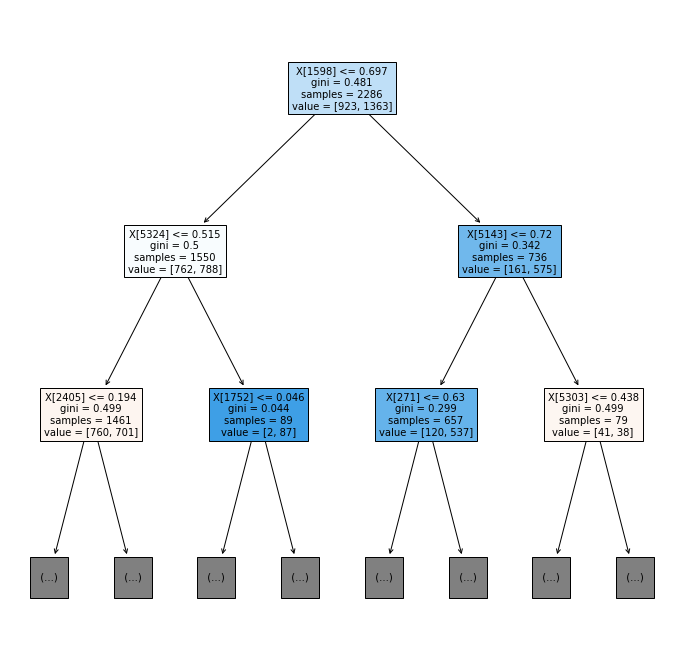

<Figure size 432x288 with 0 Axes>

In [15]:
visualize(clf)

In [121]:
def IG(clf, feature_id):
    """
    IG(Classifier clf, int feature_id)
    ======
    Returns the information gain of a split in the feature_id given,
    the higher the information gain, the better the split.
    
    The feature_id can be obtained from the tree visualization.
    
    Sources:
    Tree structure: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
    Mathematical formulation of Entropy used in SciKit: https://scikit-learn.org/stable/modules/tree.html
    Entropy or impuirity as per SciKit: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
    """
    tree_features = clf.tree_.feature
    num_features = clf.tree_.n_features
    node_samples = clf.tree_.weighted_n_node_samples
    feature_importance = np.zeros((num_features,)) # Feature importance as an array
    left_branch = clf.tree_.children_left # Index of features for left branch
    right_branch = clf.tree_.children_right # Index of features for right branch

    # Impurity is interpreted as Entropy
    entropy = clf.tree_.impurity    

    for nodeIndex,node in enumerate(clf.tree_.feature):
        if node >= 0:
            # Accumulate the feature importance over the nodes where it's used
            entropy_before_split = entropy[nodeIndex]*node_samples[nodeIndex]
            entropy_left_branch = entropy[left_branch[nodeIndex]]*node_samples[left_branch[nodeIndex]]
            entropy_right_branch = entropy[right_branch[nodeIndex]]*node_samples[right_branch[nodeIndex]]
            
            feature_importance[node] += entropy_before_split - entropy_left_branch - entropy_right_branch

    # Total number of samples at the root node
    feature_importance = feature_importance / node_samples[0]

    #Normalize the feature importance?
    #norm = feature_importance.sum()
    #if norm > 0:
    #    feature_importance = feature_importance / norm
    
    information_gain = -1
    
    # Adding feature_id column
    features = tree_features[tree_features>=0] # Negative feature is a leaf node
    features_list_by_id = list(zip(features,feature_importance[features]))
    for feat in features_list_by_id:
        if feat[0] == feature_id:
            information_gain = feat[1]
    
    print('The information gain (IG) of splitting the tree by feature_id {0} is {1}.'.format(feature_id, information_gain))

    return information_gain

In [130]:
# Values for "feature_id" are taken from the features such as X[1598], X[5324]
feat_1598 = IG(clf, 1598)
feat_5143 = IG(clf, 5143)
feat_5324 = IG(clf, 5324)

The information gain (IG) of splitting the tree by feature_id 1598 is 0.03250693683486122.
The information gain (IG) of splitting the tree by feature_id 5143 is 0.02069038228206265.
The information gain (IG) of splitting the tree by feature_id 5324 is 0.018963678165314597.


In [131]:
### Comparision with native built-in function to compute the same value
IG_by_SciKit = clf.tree_.compute_feature_importances(normalize=False)
IG_by_SciKit_Non_Negative = IG_by_SciKit[np.where(IG_by_SciKit != 0)]
IG_by_SciKit_Non_Negative[::-1].sort()
print(IG_by_SciKit_Non_Negative)

[3.25069368e-02 2.06903823e-02 1.89636782e-02 1.79707625e-02
 1.10811862e-02 6.68940052e-03 6.08999192e-03 6.06948255e-03
 5.75387286e-03 5.52933148e-03 4.36755805e-03 3.73626925e-03
 3.61583900e-03 3.48830340e-03 3.42756956e-03 3.23735588e-03
 3.16487246e-03 3.09994490e-03 3.00309996e-03 2.97109326e-03
 2.85007055e-03 2.36885476e-03 2.10974089e-03 2.08780674e-03
 1.53986876e-03 1.51666923e-03 1.50158535e-03 1.49622495e-03
 1.49603286e-03 1.48473761e-03 1.47338207e-03 1.44029615e-03
 1.20953792e-03 1.10350212e-03 1.04451863e-03 9.46843592e-04
 8.83985136e-04 8.65060407e-04 8.64948700e-04 8.58983536e-04
 8.48378801e-04 8.45836842e-04 8.45511650e-04 8.44838929e-04
 8.27247021e-04 8.26285603e-04 8.25638044e-04 8.23426483e-04
 8.16564596e-04 8.09263391e-04 8.07084380e-04 8.01983085e-04
 7.98474166e-04 7.97742684e-04 7.52847071e-04 7.49906262e-04
 7.49906262e-04 7.31934652e-04 7.31049818e-04 7.29075532e-04
 7.23534062e-04 7.11341263e-04 7.11022233e-04 6.99912511e-04
 6.92621756e-04 6.680983